## Tugas Praktikum 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

1. Gunakan dataset CC_Customer_Dataset.csv dari Tugas Pratikum

In [ ]:
# Load dataset
df = pd.read_csv('CC_Customer_Dataset.csv')

# Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


2. Buatlah model klasterisasi dengan menggunakan Agglomerative Clustering dengan seluruh variabel yang dapat digunakan.

In [ ]:
# Slicing data for clustering
X = df.iloc[:, 2:7].values

print(X)

[[100000      2      1      1      0]
 [ 50000      3      0     10      9]
 [ 50000      7      1      3      4]
 ...
 [145000      8      1      9      1]
 [172000     10      1     15      0]
 [167000      9      0     12      2]]


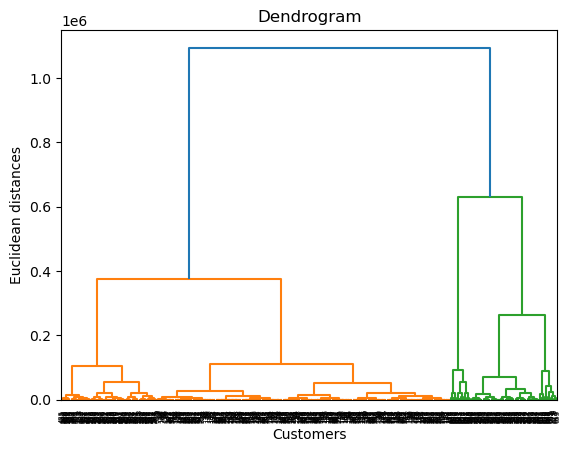

In [ ]:
# Build dendogram
import scipy.cluster.hierarchy as sch

# Build dendogram using ward distance
# more info - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X_scaled)

# Add cluster result to dataframe
df['Cluster'] = y_hc

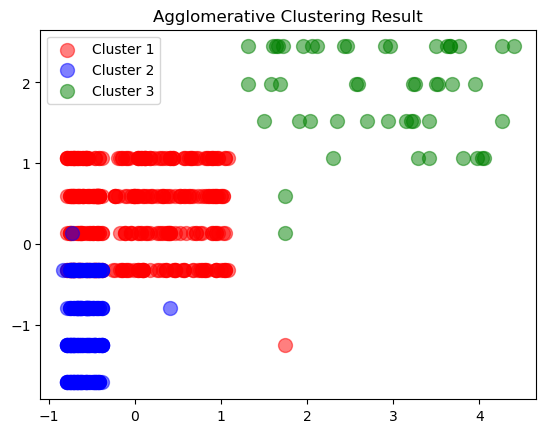

In [ ]:
# Visualize The Result
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s = 100, alpha=0.5, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s = 100, alpha=0.5, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s = 100, alpha=0.5, c = 'green', label = 'Cluster 3')
plt.title('Agglomerative Clustering Result')
plt.legend()
plt.show()

3. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Tunjukkan bentuk cluster-nya berdasarkan dua fitur tersebut.

In [ ]:
# Slicing data for two features (Avg_Credit_Limit and Total_Credit_Cards)
X1 = df[["Avg_Credit_Limit", "Total_Credit_Cards"]].values

In [ ]:
# Agglomerative Clustering for two features
hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X1)

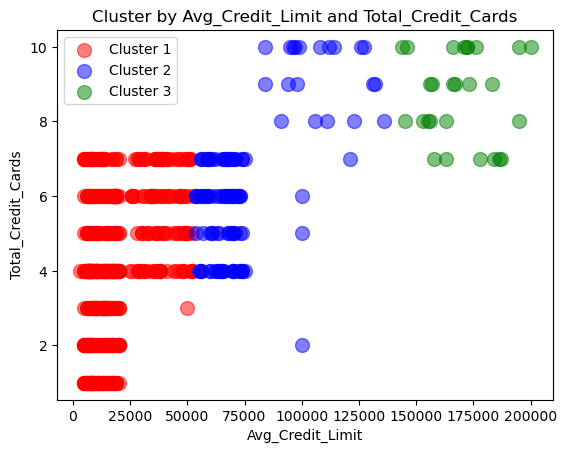

In [ ]:
# Scatterplot based on two features
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 100, alpha=0.5, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 100, alpha=0.5, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s = 100, alpha=0.5, c = 'green', label = 'Cluster 3')
plt.title('Cluster by Avg_Credit_Limit and Total_Credit_Cards')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend()
plt.show()

4. Tentukan nilai silhouette score dan DBI dari model.

In [ ]:
# Calculate Silhouette and Davies-Bouldin Index Coefficient
sil_score = silhouette_score(X_scaled, y_hc)
dbi_score = davies_bouldin_score(X_scaled, y_hc)

print(f'Silhouette Coefficient: {sil_score}')
print(f'Davies-Bouldin Index: {dbi_score}')

Silhouette Coefficient: 0.5147639589977819
Davies-Bouldin Index: 0.680959518994733


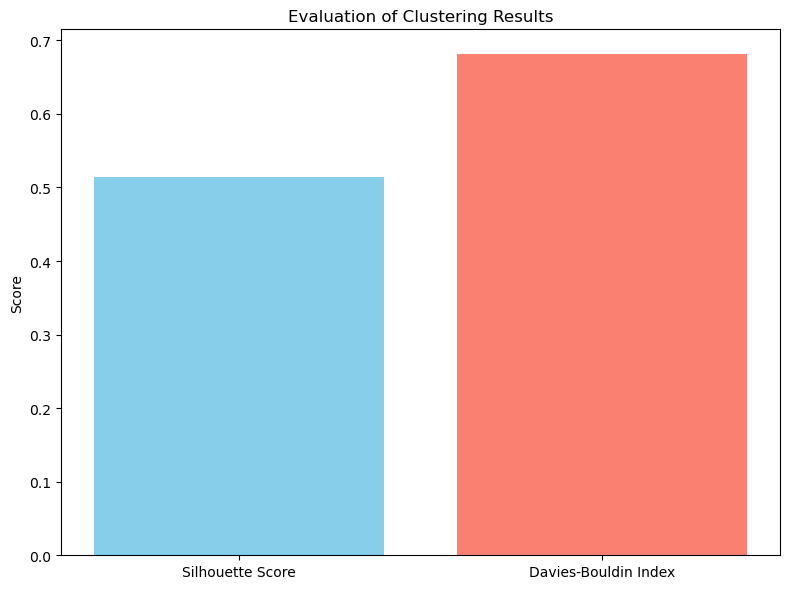

In [ ]:
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Evaluation Results Visualization
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluation of Clustering Results")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

The Silhouette Coefficient (0.5147) and Davies-Bouldin Index (0.6809) indicates that the clusters are well separated and performs well in grouping similar customers effectively.
